In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
demographic_columns = [
    'Age',
    'Gender',
    'Education',
    'Country',
    'Ethnicity'
]

personality_columns = [
    'Neuroticism',
    'Extraversion',
    'Openness to experience',
    'Agreeableness',
    'Conscientiousness',
    'Impulsiveness',
    'Sensation seeking'
]

features_columns = demographic_columns + personality_columns

drugs_columns = [
    'Alcohol consumption',
    'Amphetamines consumption',
    'Amyl nitrite consumption',
    'Benzodiazepine consumption',
    'Caffeine consumption',
    'Cannabis consumption',
    'Chocolate consumption',
    'Cocaine consumption',
    'Crack consumption',
    'Ecstasy consumption',
    'Heroin consumption',
    'Ketamine consumption',
    'Legal highs consumption',
    'LSD consumption',
    'Methadone consumption',
    'Magic consumption',
    'Nicotine consumption',
    'Fictitious drug Semeron consumption',
    'Volatile substance abuse consumption'
]

drugs_legal = [
    'Alcohol consumption',
    'Caffeine consumption',
    'Chocolate consumption',
    'Nicotine consumption'
]

drugs_illegal = [drug for drug in drugs_columns if drug not in drugs_legal]

all_columns = features_columns + drugs_columns

In [4]:
data = pd.read_csv('drug_consumption.data', names= ["ID"] + all_columns )

data = data.set_index("ID")

In [5]:
data.head(10)

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,...,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,LSD consumption,Methadone consumption,Magic consumption,Nicotine consumption,Fictitious drug Semeron consumption,Volatile substance abuse consumption
ID,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,1.13407,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [6]:
data.tail(10)

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,...,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,LSD consumption,Methadone consumption,Magic consumption,Nicotine consumption,Fictitious drug Semeron consumption,Volatile substance abuse consumption
ID,,,,,,,,,,,,,,,,,,,,,
1879,-0.95197,-0.48246,-0.61113,-0.57009,0.12600,-0.05188,-1.76250,0.58331,-0.76096,-0.14277,...,CL5,CL0,CL0,CL2,CL4,CL0,CL4,CL6,CL0,CL2
1880,-0.07854,-0.48246,-0.61113,0.24923,0.11440,-0.14882,-0.57545,1.43533,-0.91699,-0.78155,...,CL3,CL0,CL3,CL5,CL3,CL0,CL4,CL2,CL0,CL2
1881,-0.95197,-0.48246,-1.43719,-0.57009,-0.31685,1.49158,-1.92173,-0.58331,-1.77200,0.58489,...,CL2,CL5,CL0,CL2,CL0,CL6,CL0,CL6,CL0,CL2
1882,-0.95197,-0.48246,0.45468,0.24923,-0.31685,-0.05188,-1.76250,0.88309,-0.76096,2.33337,...,CL0,CL0,CL0,CL2,CL0,CL0,CL2,CL2,CL0,CL0
1883,-0.95197,-0.48246,-0.61113,-0.28519,-0.31685,-0.79151,0.32197,0.29338,-0.30172,-0.27607,...,CL5,CL2,CL0,CL4,CL5,CL4,CL0,CL6,CL0,CL1
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [7]:
data.describe()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,Impulsiveness,Sensation seeking
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [8]:
data.isnull().values.any()

False

In [9]:
data = data[data["Fictitious drug Semeron consumption"] == 'CL0']

In [10]:
for i in drugs_columns:
    data[i] = data[i].map({'CL0':0,'CL1':0,'CL2':0,'CL3':0,
                           'CL4':1,'CL5':1,'CL6':1})

In [11]:
data.shape

(1877, 31)

In [12]:
data.describe()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,...,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,LSD consumption,Methadone consumption,Magic consumption,Nicotine consumption,Fictitious drug Semeron consumption,Volatile substance abuse consumption
count,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,...,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.0,1877.000000
mean,0.037577,-0.000771,-0.000984,0.358984,-0.309728,-0.000551,-0.001951,-0.003224,-0.000657,-0.000394,...,0.126798,0.028237,0.041023,0.127864,0.086841,0.091103,0.083111,0.462973,0.0,0.018114
std,0.878387,0.482588,0.949831,0.699707,0.166220,0.998442,0.997418,0.995691,0.996689,0.997657,...,0.332835,0.165692,0.198396,0.334027,0.281677,0.287832,0.276124,0.498760,0.0,0.133399
min,-0.951970,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,-0.951970,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,-0.078540,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,0.497880,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000
max,2.591710,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [13]:
data.head(10)

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,...,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,LSD consumption,Methadone consumption,Magic consumption,Nicotine consumption,Fictitious drug Semeron consumption,Volatile substance abuse consumption
ID,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,0,0,0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,1,0,0,0,0,0,0,1,0,0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,0,0,0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,0,0,0,0,0,0,0,0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,0,0,0,0,0,0,0,0,0
6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,0,0,0,0,0,0,0,1,0,0
7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,...,0,0,0,0,0,0,0,1,0,0
8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,...,0,0,0,0,0,0,0,0,0,0
9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,1.13407,...,0,0,0,0,0,0,0,1,0,0


In [14]:
data.tail(10)

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,...,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,LSD consumption,Methadone consumption,Magic consumption,Nicotine consumption,Fictitious drug Semeron consumption,Volatile substance abuse consumption
ID,,,,,,,,,,,,,,,,,,,,,
1879,-0.95197,-0.48246,-0.61113,-0.57009,0.12600,-0.05188,-1.76250,0.58331,-0.76096,-0.14277,...,1,0,0,0,1,0,1,1,0,0
1880,-0.07854,-0.48246,-0.61113,0.24923,0.11440,-0.14882,-0.57545,1.43533,-0.91699,-0.78155,...,0,0,0,1,0,0,1,0,0,0
1881,-0.95197,-0.48246,-1.43719,-0.57009,-0.31685,1.49158,-1.92173,-0.58331,-1.77200,0.58489,...,0,1,0,0,0,1,0,1,0,0
1882,-0.95197,-0.48246,0.45468,0.24923,-0.31685,-0.05188,-1.76250,0.88309,-0.76096,2.33337,...,0,0,0,0,0,0,0,0,0,0
1883,-0.95197,-0.48246,-0.61113,-0.28519,-0.31685,-0.79151,0.32197,0.29338,-0.30172,-0.27607,...,1,0,0,1,1,1,0,1,0,0
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,0,0,0,0,0,0,0,0,0,1
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,0,0,0,0,1,1,1,1,0,0
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,1,0,0,0,0,0,0,1,0,0
1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,0,0,0,0,0,0,0,1,0,0


In [15]:
data['heroinPl'] = data.apply(lambda x: int((x['Cocaine consumption'] + x['Crack consumption'] + x['Heroin consumption'] + x['Methadone consumption'])>0), axis = 1)

In [16]:
data['ecstasyPl'] = data.apply(lambda x: int((x['Amphetamines consumption'] + x['Cannabis consumption'] + x['Cocaine consumption'] + x['Ketamine consumption'] + x['LSD consumption'] + x['Magic consumption'] + x['Legal highs consumption'] + x['Ecstasy consumption'])>0), axis = 1)

In [17]:
data['benzoPl'] = data.apply(lambda x: int((x['Amphetamines consumption'] + x['Cocaine consumption'] + x['Methadone consumption'])>0), axis = 1)

In [18]:
data = data.drop([i for i in drugs_columns], axis=1)

In [19]:
demo_data = data.copy()

In [20]:
age = [0 if a <= -0.9 else 
       1 if a >= -0.5 and a < 0 else 
       2 if a > 0 and a < 1 else 
       3 if a > 1 and a < 1.5 else 
       4 if a > 1.5 and a < 2 else 
       5 
       for a in demo_data['Age']]

gender = [0 if g > 0 else 1 for g in demo_data['Gender']]

education = [0 if e <-2 else 
             1 if e > -2 and e < -1.5 else 
             2 if e > -1.5 and e < -1.4 else 
             3 if e > -1.4 and e < -1 else 
             4 if e > -1 and e < -0.5 else 
             5 if e > -0.5 and e < 0 else 
             6 if e > 0 and e < 0.5 else 
             7 if e > 0.5 and e < 1.5 else 
             8 
             for e in demo_data['Education']]

country = [6 if c < -0.5 else 
           2 if c > -0.5 and c < -0.4 else 
           3 if c > -0.4 and c < -0.2 else 
           0 if c > -0.2 and c < 0 else 
           4 if c > 0 and c < 0.23 else 
           1 if c > 0.23 and c < 0.9 else 
           5 
           for c in demo_data['Country']]

ethnicity = [1 if e < -1 else 
             0 if e > -1 and e < -0.4 else 
             6 if e > -0.4 and e < -0.25 else 
             4 if e >= -0.25 and e < 0.11 else 
             3 if e > 0.12 and e < 1 else 
             2 if e > 1.9 else 
             5 
             for e in demo_data['Ethnicity']]


demo_data['Age'] = age
demo_data['Gender'] = gender
demo_data['Education'] = education
demo_data['Country'] = country
demo_data['Ethnicity'] = ethnicity

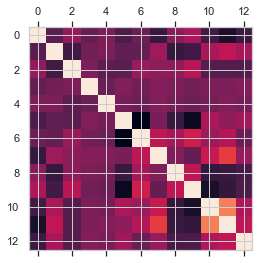

In [21]:
data1 = demo_data.drop(['ecstasyPl', 'benzoPl'], axis=1)
data2 = demo_data.drop(['heroinPl', 'benzoPl'], axis=1)
data3 = demo_data.drop(['heroinPl', 'ecstasyPl'], axis=1)

corr1 = data1.corr()
corr2 = data2.corr()
corr3 = data3.corr()

plt.matshow(corr1)
plt.show()

In [22]:
data.nunique()

Age                        6
Gender                     2
Education                  9
Country                    7
Ethnicity                  7
Neuroticism               49
Extraversion              42
Openness to experience    35
Agreeableness             41
Conscientiousness         41
Impulsiveness             10
Sensation seeking         11
heroinPl                   2
ecstasyPl                  2
benzoPl                    2
dtype: int64

In [23]:
corr_on_heroinPl = data1.corrwith(data1.heroinPl)
corr_on_heroinPl_dict = corr_on_heroinPl.to_dict()

corr_on_ecstasyPl = data2.corrwith(data2.ecstasyPl)
corr_on_ecstasyPl_dict = corr_on_ecstasyPl.to_dict()

corr_on_benzoPl = data3.corrwith(data3.benzoPl)
corr_on_benzoPl_dict = corr_on_benzoPl.to_dict()

In [24]:
def removekey(d, key):
    r = dict(d)
    del r[key]
    return r
  
corr_on_heroinPl_dict = removekey(corr_on_heroinPl_dict, 'heroinPl')
corr_on_ecstasyPl_dict = removekey(corr_on_ecstasyPl_dict, 'ecstasyPl')
corr_on_benzoPl_dict = removekey(corr_on_benzoPl_dict, 'benzoPl')

In [25]:
import operator
sorted_dict1 = sorted(corr_on_heroinPl_dict.items(), key=operator.itemgetter(1))
sorted_dict2 = sorted(corr_on_ecstasyPl_dict.items(), key=operator.itemgetter(1))
sorted_dict3 = sorted(corr_on_benzoPl_dict.items(), key=operator.itemgetter(1))

Text(0.5, 1.0, 'Correlation value on heroinPl ')

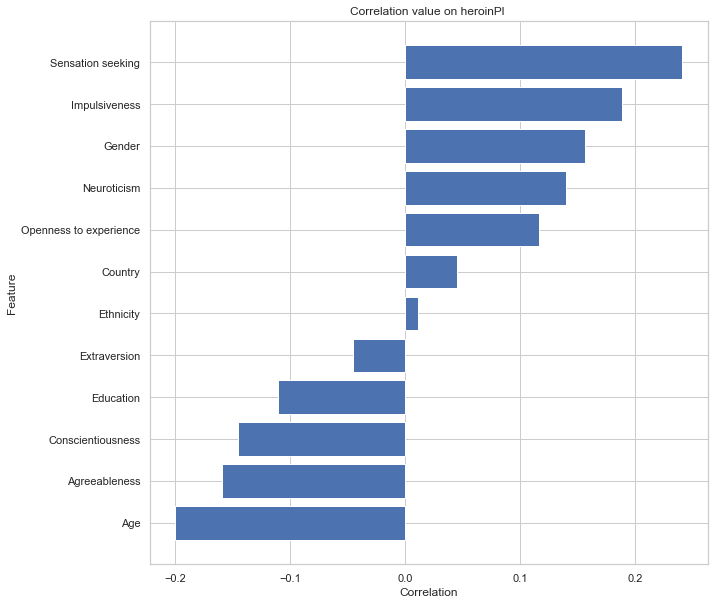

In [26]:
plt.figure(figsize=(10,10)) 
plt.barh(list(map(lambda x: x[0],sorted_dict1)), list(map(lambda x: x[1],sorted_dict1))) 
plt.xlabel('Correlation') 
plt.ylabel('Feature') 
plt.title('Correlation value on heroinPl ')

Text(0.5, 1.0, 'Correlation value on ecstasyPl ')

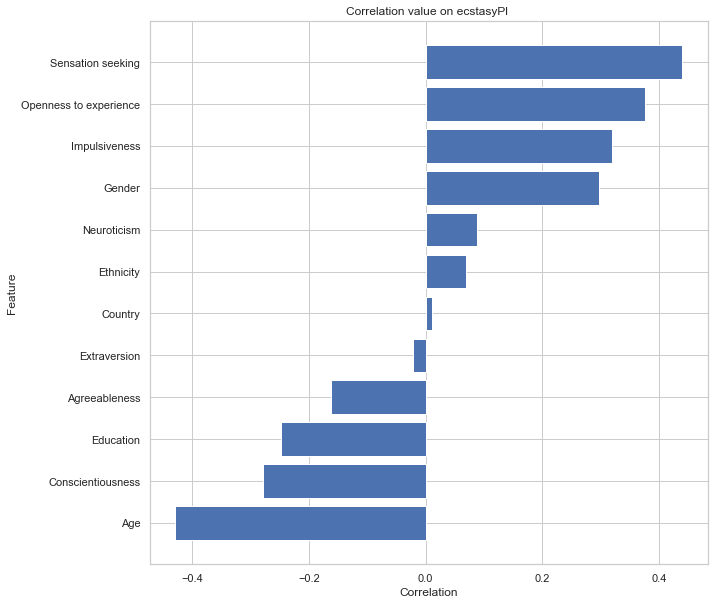

In [27]:
plt.figure(figsize=(10,10)) 
plt.barh(list(map(lambda x: x[0],sorted_dict2)), list(map(lambda x: x[1],sorted_dict2))) 
plt.xlabel('Correlation') 
plt.ylabel('Feature') 
plt.title('Correlation value on ecstasyPl ')

Text(0.5, 1.0, 'Correlation value on benzoPl ')

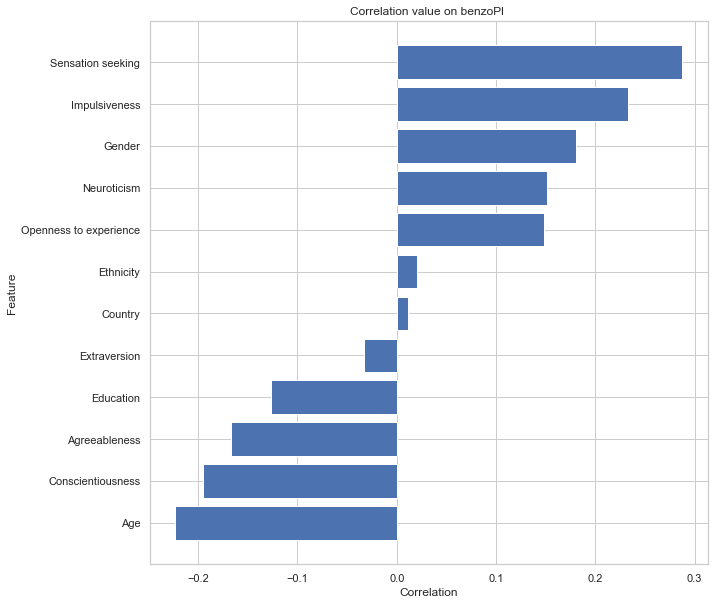

In [28]:
plt.figure(figsize=(10,10)) 
plt.barh(list(map(lambda x: x[0],sorted_dict3)), list(map(lambda x: x[1],sorted_dict3))) 
plt.xlabel('Correlation') 
plt.ylabel('Feature') 
plt.title('Correlation value on benzoPl ')

In [29]:
age = ['18-24' if a <= -0.9 else 
       '25-34' if a >= -0.5 and a < 0 else 
       '35-44' if a > 0 and a < 1 else 
       '45-54' if a > 1 and a < 1.5 else 
       '55-64' if a > 1.5 and a < 2 else 
       '65+' 
       for a in data['Age']]

gender = ['Female' if g > 0 else "Male" for g in data['Gender']]

education = ['Left school before 16 years' if e <-2 else 
             'Left school at 16 years' if e > -2 and e < -1.5 else 
             'Left school at 17 years' if e > -1.5 and e < -1.4 else 
             'Left school at 18 years' if e > -1.4 and e < -1 else 
             'Some college or university, no certificate or degree' if e > -1 and e < -0.5 else 
             'Professional certificate/ diploma' if e > -0.5 and e < 0 else 
             'University degree' if e > 0 and e < 0.5 else 
             'Masters degree' if e > 0.5 and e < 1.5 else 
             'Doctorate degree' 
             for e in data['Education']]

country = ['USA' if c < -0.5 else 
           'New Zealand' if c > -0.5 and c < -0.4 else 
           'Other' if c > -0.4 and c < -0.2 else 
           'Australia' if c > -0.2 and c < 0 else 
           'Ireland' if c > 0 and c < 0.23 else 
           'Canada' if c > 0.23 and c < 0.9 else 
           'UK' 
           for c in data['Country']]

ethnicity = ['Black' if e < -1 else 
             'Asian' if e > -1 and e < -0.4 else 
             'White' if e > -0.4 and e < -0.25 else 
             'Mixed-White/Black' if e >= -0.25 and e < 0.11 else 
             'Mixed-White/Asian' if e > 0.12 and e < 1 else 
             'Mixed-Black/Asian' if e > 1.9 else 
             'Other' 
             for e in data['Ethnicity']]


demo_data['Age'] = age
demo_data['Gender'] = gender
demo_data['Education'] = education
demo_data['Country'] = country
demo_data['Ethnicity'] = ethnicity

In [31]:
demo_data.head(10)

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,Impulsiveness,Sensation seeking,heroinPl,ecstasyPl,benzoPl
ID,,,,,,,,,,,,,,,
1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,0,0
2,25-34,Male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,1,0
3,35-44,Male,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,0
4,18-24,Female,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,0
5,35-44,Female,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,0
6,65+,Female,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,0,0
7,45-54,Male,Masters degree,USA,White,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,0.07987,0,0,0
8,35-44,Male,Left school at 16 years,UK,White,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593,0,0,0
9,35-44,Female,Professional certificate/ diploma,Canada,White,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,-1.54858,0,0,0


Text(0.5, 1.0, 'people number of Ethnicity')

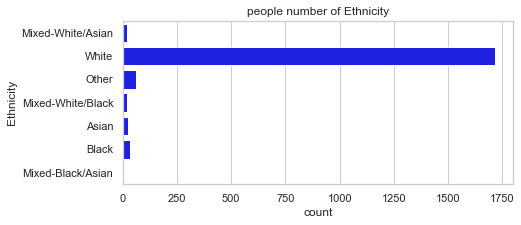

In [32]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="Ethnicity", data=demo_data, color="blue");
plt.title('people number of Ethnicity')

Text(0.5, 1.0, 'people number of Country')

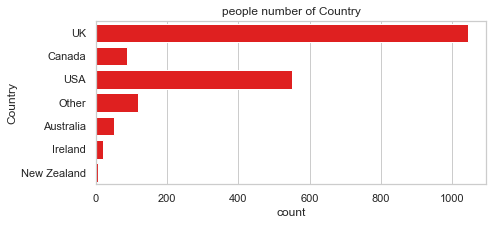

In [33]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="Country", data=demo_data, color="red");
plt.title('people number of Country')

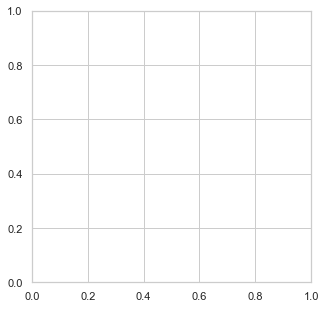

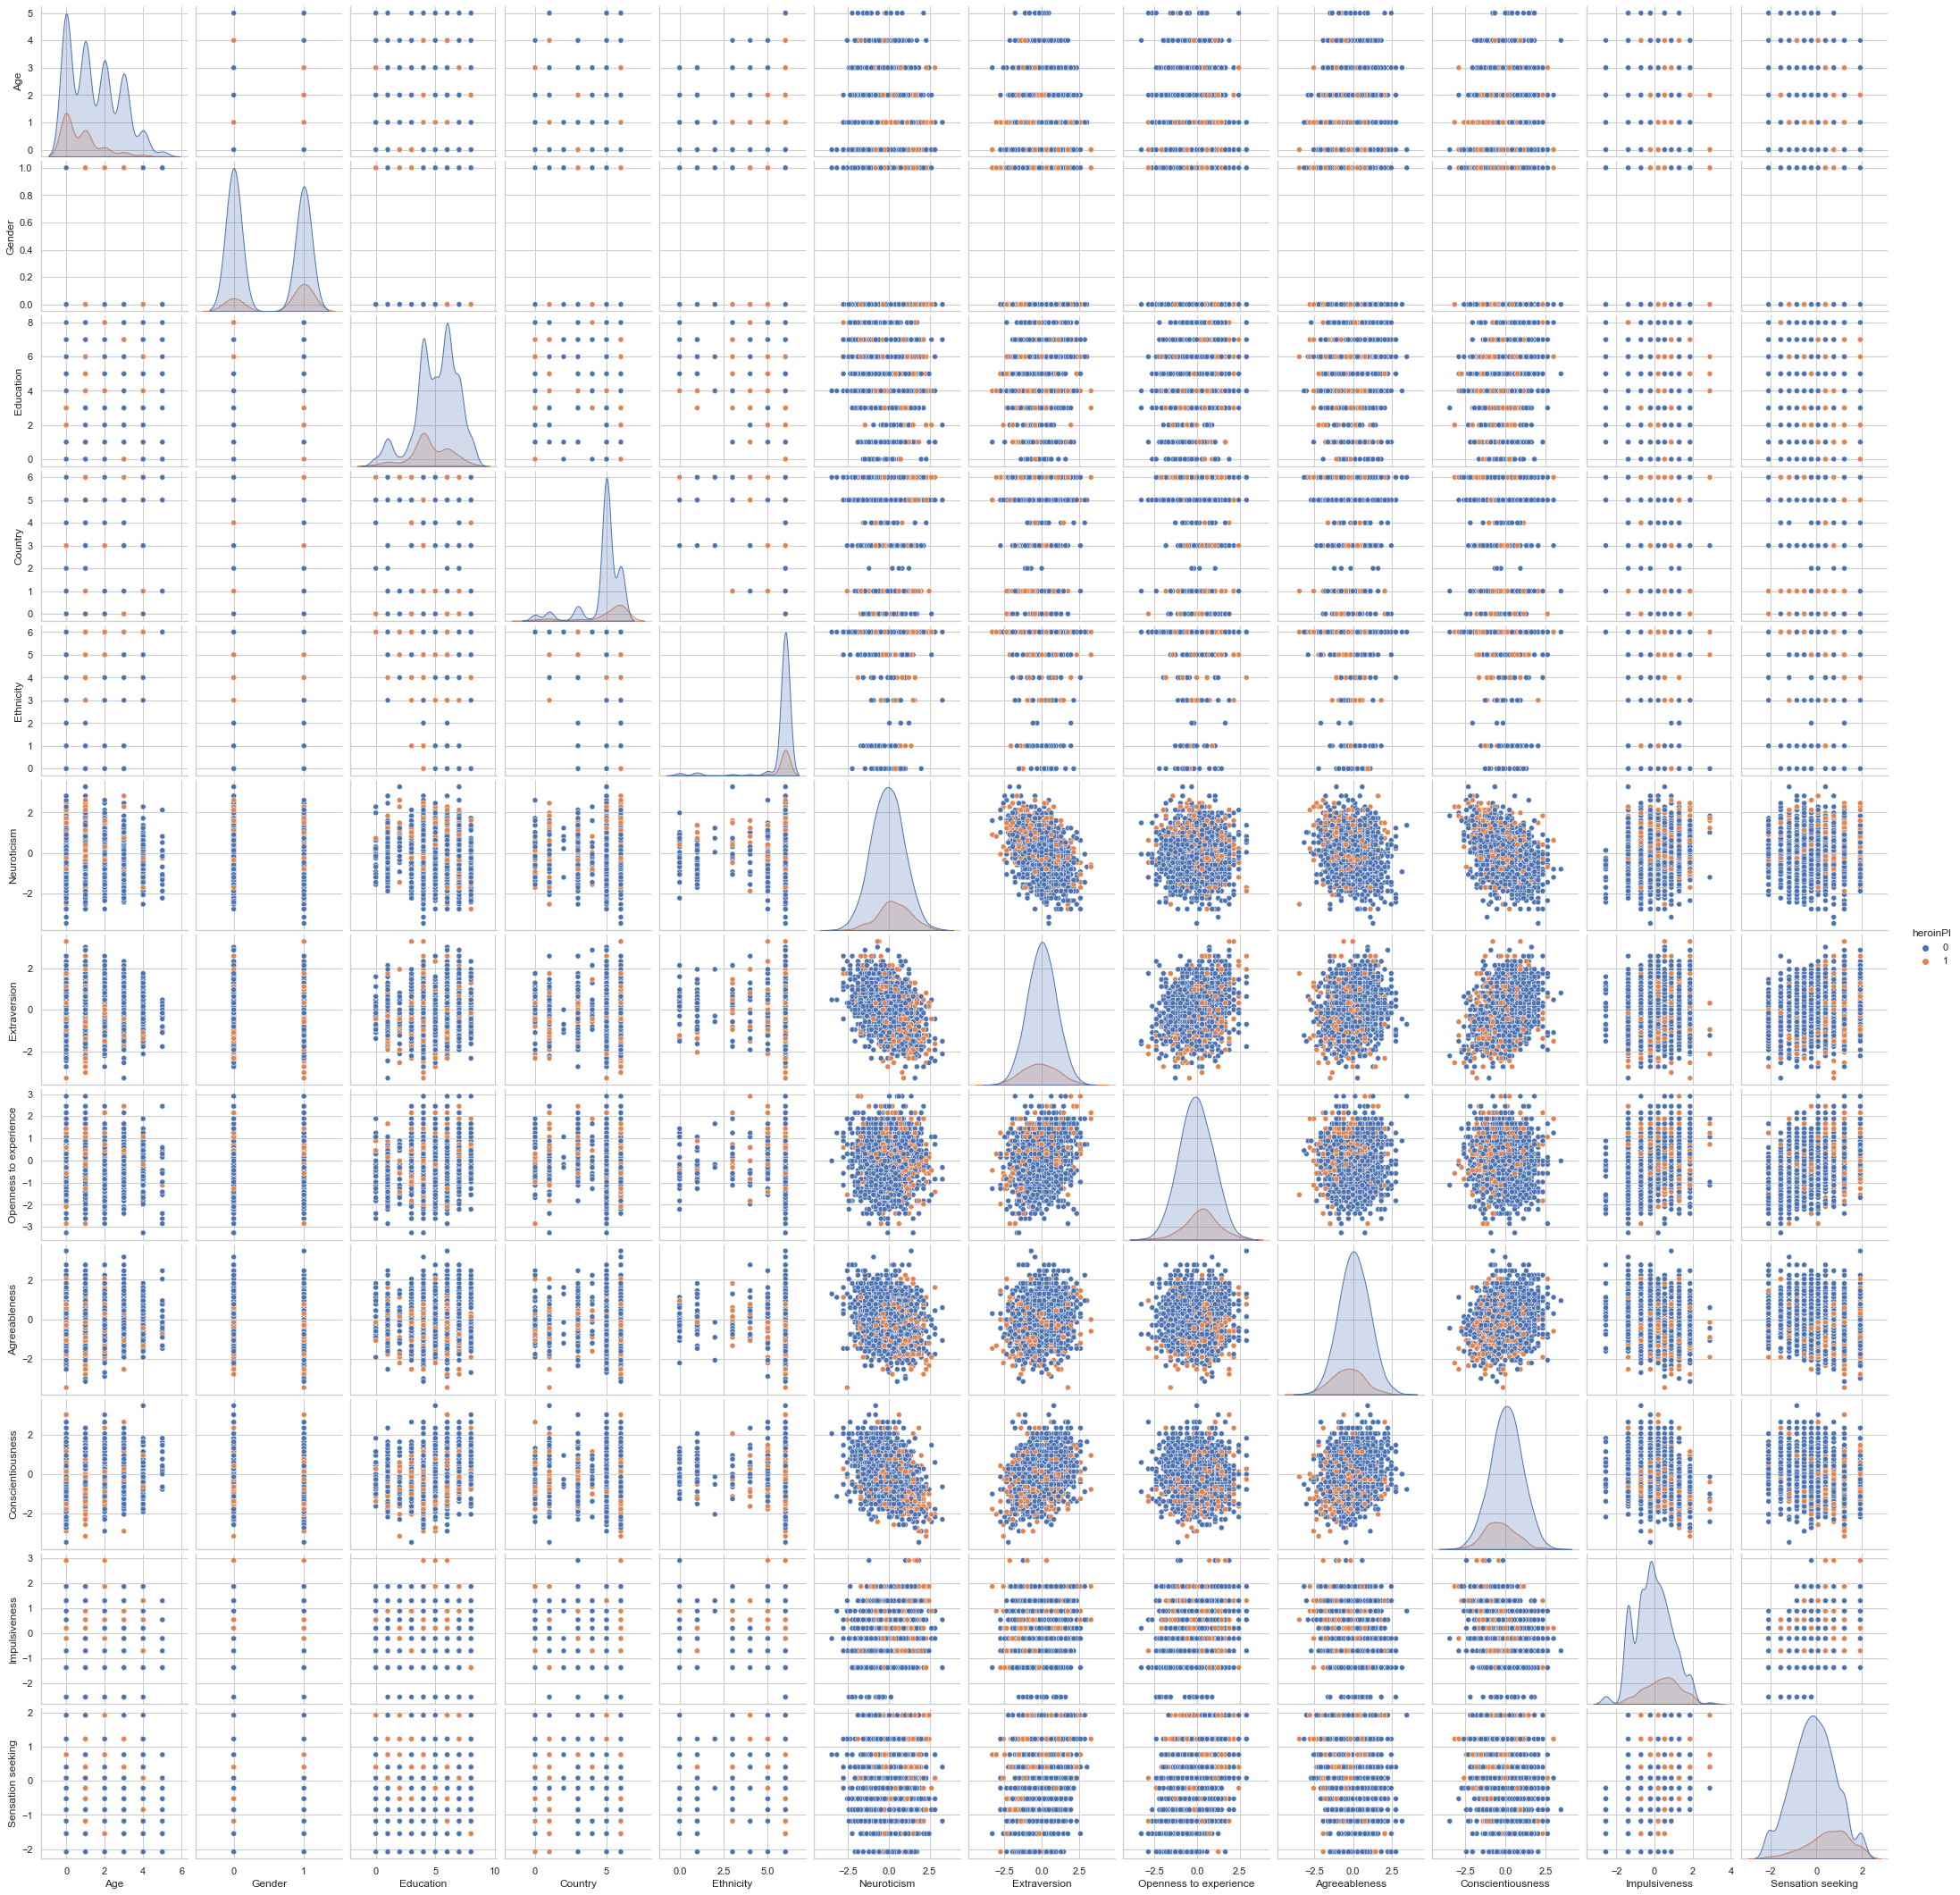

In [58]:
a4_dims = (5, 5)
fig, ax = plt.subplots(figsize=a4_dims)

graph1 = sns.pairplot(data1, hue ='heroinPl')

Text(0.5, 1.0, 'Density estimates of dependancy between Age and Sensation seeking score')

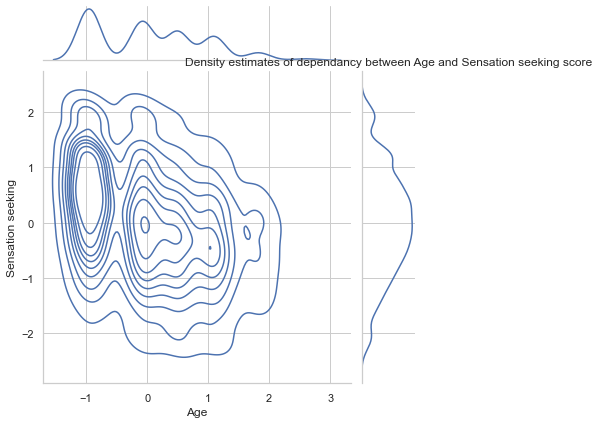

In [34]:
sns.jointplot(x="Age", y="Sensation seeking", data=data, kind="kde");
plt.title('Density estimates of dependancy between Age and Sensation seeking score')

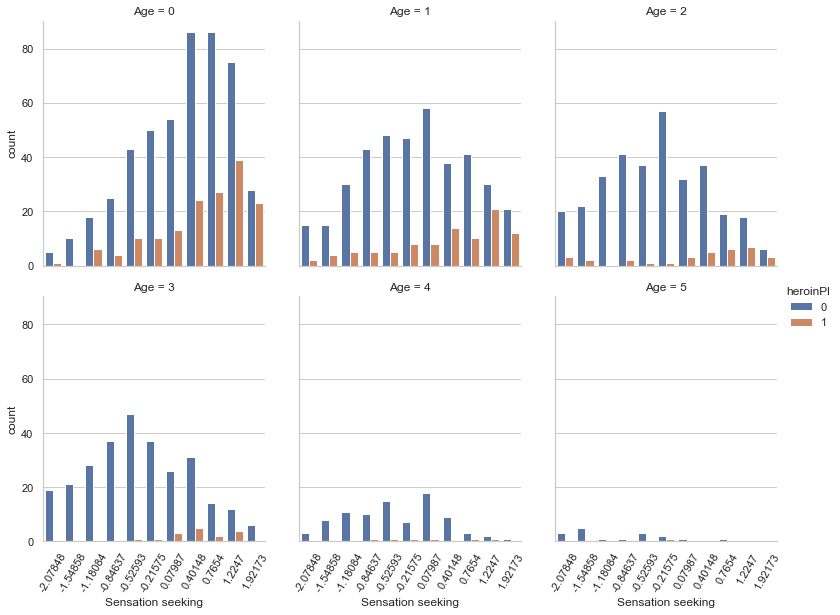

In [35]:
g = sns.catplot(x="Sensation seeking", 
                hue="heroinPl", col="Age", col_wrap=3,
                 data=data1, kind="count",
                 height=4, aspect=0.9);
g.set_xticklabels(rotation=60)

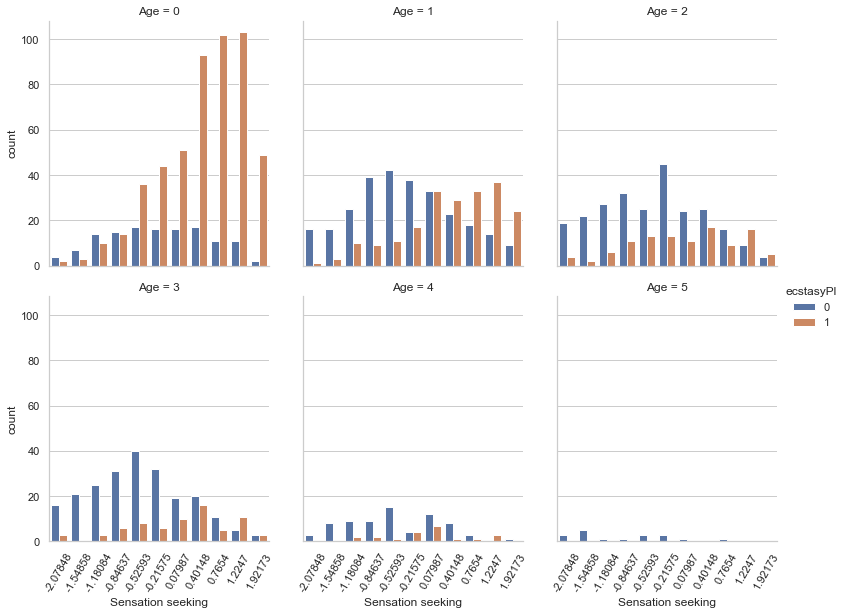

In [39]:
g = sns.catplot(x="Sensation seeking", 
                hue="ecstasyPl", col="Age", col_wrap=3,
                 data=data2, kind="count",
                 height=4, aspect=0.9);
g.set_xticklabels(rotation=60)

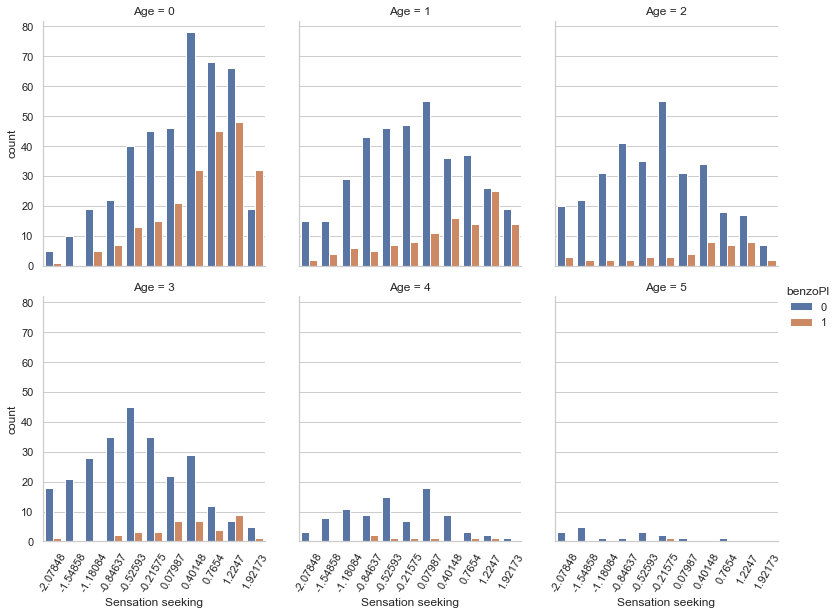

In [41]:
g = sns.catplot(x="Sensation seeking", 
                hue="benzoPl", col="Age", col_wrap=3,
                 data=data3, kind="count",
                 height=4, aspect=0.9);
g.set_xticklabels(rotation=60)

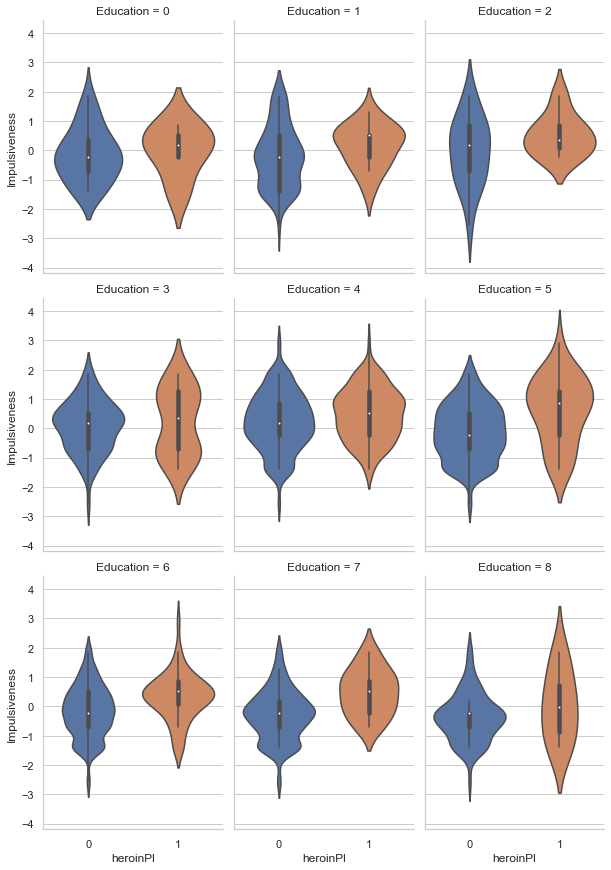

In [42]:
g = sns.catplot(x="heroinPl", y= 'Impulsiveness',
                col="Education", col_wrap=3,data=data1, kind="violin",
                split=True, height=4, aspect=.7);

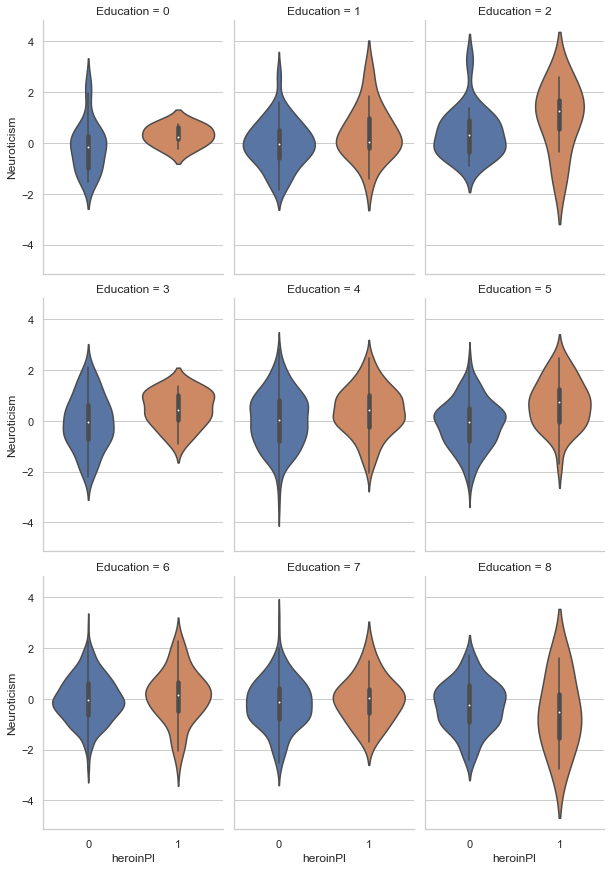

In [43]:
g = sns.catplot(x="heroinPl", y= 'Neuroticism',
                col="Education", col_wrap=3,data=data1, kind="violin",
                split=True, height=4, aspect=.7);

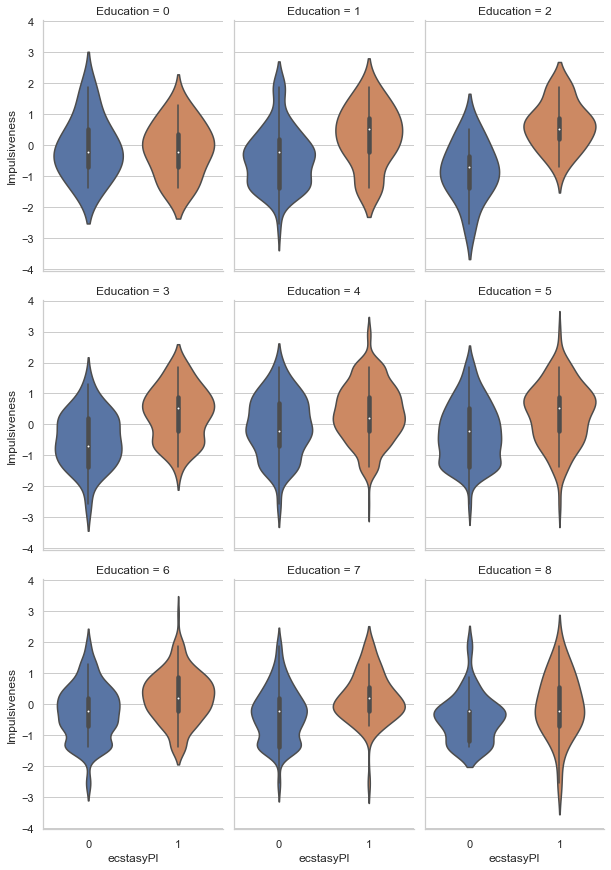

In [44]:
g = sns.catplot(x="ecstasyPl", y= 'Impulsiveness',
                col="Education", col_wrap=3,data=data2, kind="violin",
                split=True, height=4, aspect=.7);

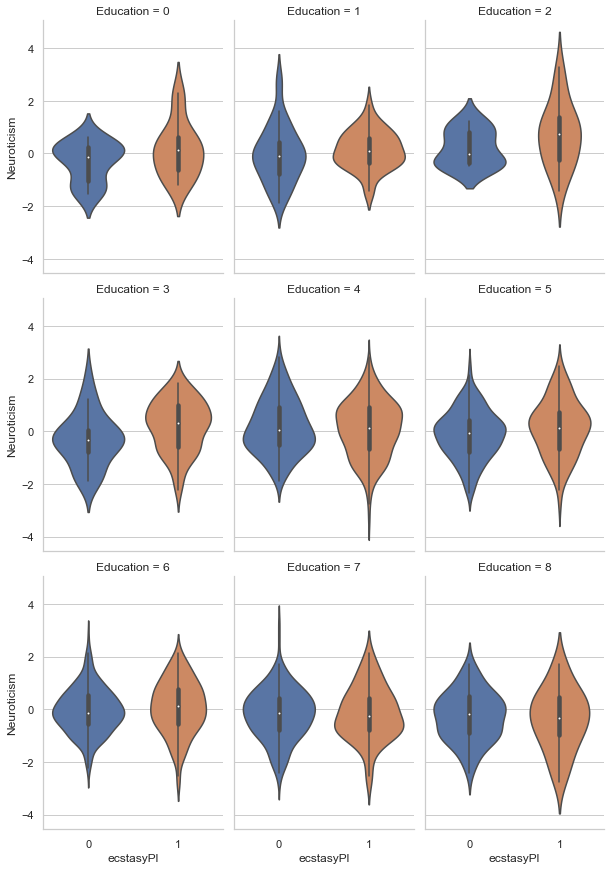

In [45]:
g = sns.catplot(x="ecstasyPl", y= 'Neuroticism',
                col="Education", col_wrap=3,data=data2, kind="violin",
                split=True, height=4, aspect=.7);

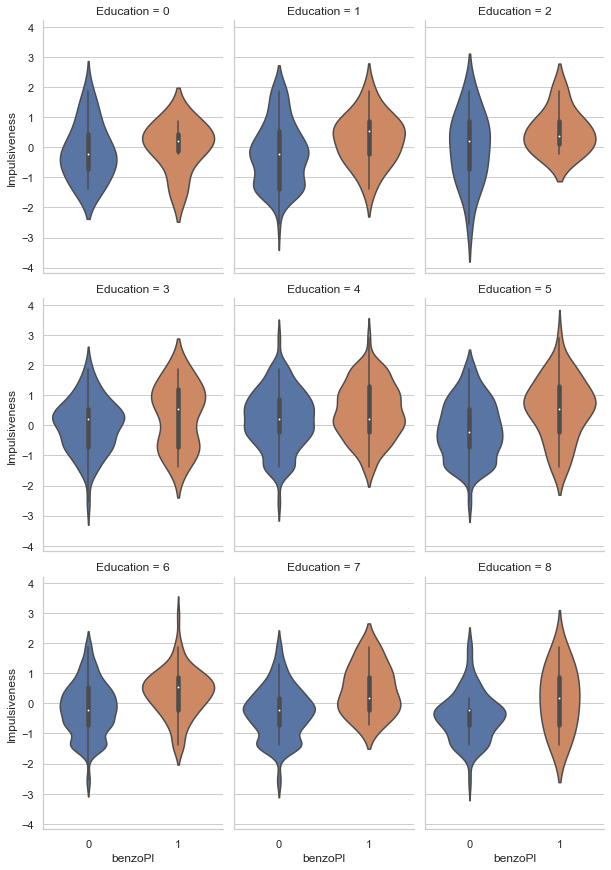

In [46]:
g = sns.catplot(x="benzoPl", y= 'Impulsiveness',
                col="Education", col_wrap=3,data=data3, kind="violin",
                split=True, height=4, aspect=.7);

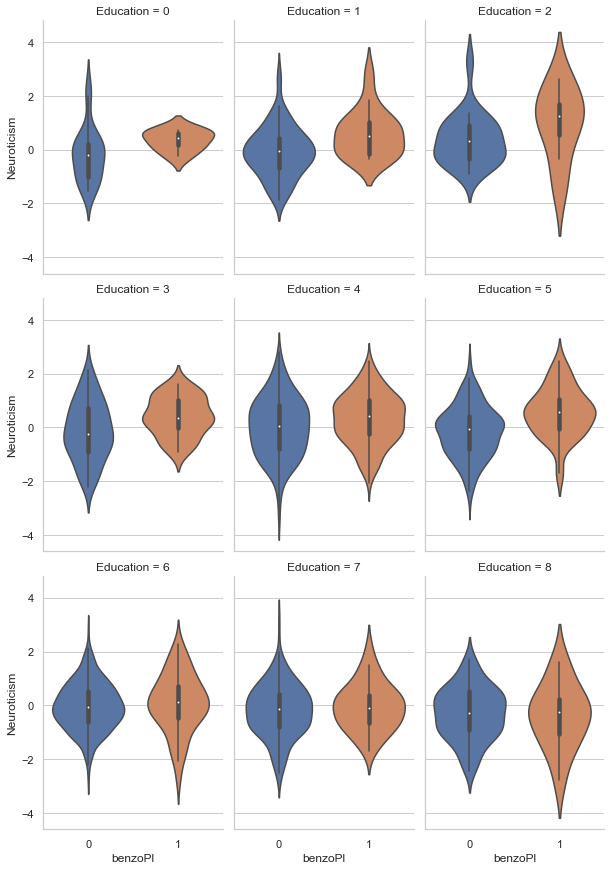

In [47]:
g = sns.catplot(x="benzoPl", y= 'Neuroticism',
                col="Education", col_wrap=3,data=data3, kind="violin",
                split=True, height=4, aspect=.7);

In [48]:
data1 = data1.drop(['Ethnicity', 'Country'], axis=1)
data2 = data2.drop(['Ethnicity', 'Country'], axis=1)
data3 = data3.drop(['Ethnicity', 'Country'], axis=1)

In [49]:
data1.head()

,Age,Gender,Education,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,Impulsiveness,Sensation seeking,heroinPl
ID,,,,,,,,,,,
1,2,0,5,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
2,1,1,8,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0
3,2,1,5,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
4,0,0,7,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
5,2,0,8,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0


In [50]:
data2.head()

,Age,Gender,Education,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,Impulsiveness,Sensation seeking,ecstasyPl
ID,,,,,,,,,,,
1,2,0,5,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
2,1,1,8,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
3,2,1,5,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
4,0,0,7,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
5,2,0,8,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0


In [51]:
data3.head()

,Age,Gender,Education,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,Impulsiveness,Sensation seeking,benzoPl
ID,,,,,,,,,,,
1,2,0,5,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
2,1,1,8,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0
3,2,1,5,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
4,0,0,7,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
5,2,0,8,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0


In [36]:
def value_counts_percentage(dataset, column):
    
    a = dataset[column].value_counts()
    b = dataset[column].value_counts(normalize=True) * 100
    
    return pd.concat([a,b.round(2)], axis=1, keys=['Number', '%'])

In [37]:
value_counts_percentage(data, 'heroinPl')

,Number,%
0,1570,83.64
1,307,16.36


In [38]:
value_counts_percentage(data, 'ecstasyPl')

,Number,%
0,964,51.36
1,913,48.64


In [39]:
value_counts_percentage(data, 'benzoPl')

,Number,%
0,1457,77.62
1,420,22.38


In [66]:
#One-hot encoding, using get_dummies, for Education column for heroinPl target dataset

dummies_education = pd.get_dummies(data1["Education"], prefix = 'Education')
data1 = pd.concat([data1, dummies_education], axis = 1)

#One-hot encoding, using get_dummies, for Age column for heroinPl target dataset
dummies_age = pd.get_dummies(data1["Age"], prefix = 'Age')
data1 = pd.concat([data1, dummies_age], axis = 1)

In [67]:
#One-hot encoding, using get_dummies, for Education column for ecstasyPl target dataset

dummies_education = pd.get_dummies(data2["Education"], prefix = 'Education')
data2 = pd.concat([data2, dummies_education], axis = 1)

#One-hot encoding, using get_dummies, for Age column for ecstasyPl target dataset
dummies_age = pd.get_dummies(data2["Age"], prefix = 'Age')
data2 = pd.concat([data2, dummies_age], axis = 1)

In [68]:
#One-hot encoding, using get_dummies, for Education column for benzoPl target dataset

dummies_education = pd.get_dummies(data3["Education"], prefix = 'Education')
data3 = pd.concat([data3, dummies_education], axis = 1)

#One-hot encoding, using get_dummies, for Age column for benzoPl target dataset
dummies_age = pd.get_dummies(data3["Age"], prefix = 'Age')
data3 = pd.concat([data3, dummies_age], axis = 1)

In [69]:
data1 = data1.drop(['Education', 'Age'], axis=1)
data2 = data2.drop(['Education', 'Age'], axis=1)
data3 = data3.drop(['Education', 'Age'], axis=1)

In [70]:
# Separating features and the target

#dataset on heroinPl target
y1 = data1['heroinPl']
X1 = data1.drop(['heroinPl'], axis=1)

#dataset on ecstasyPl target
y2 = data2['ecstasyPl']
X2 = data2.drop(['ecstasyPl'], axis=1)

#dataset on benzoPl target
y3 = data3['benzoPl']
X3 = data3.drop(['benzoPl'], axis=1)

In [71]:
data1.head()

,Gender,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,Impulsiveness,Sensation seeking,heroinPl,Education_0,...,Education_5,Education_6,Education_7,Education_8,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5
ID,,,,,,,,,,,,,,,,,,,,,
1,0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,0,...,1,0,0,0,0,0,1,0,0,0
2,1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,...,0,0,1,0,1,0,0,0,0,0
5,0,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,...,0,0,0,1,0,0,1,0,0,0


In [72]:
data2.head()

,Gender,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,Impulsiveness,Sensation seeking,ecstasyPl,Education_0,...,Education_5,Education_6,Education_7,Education_8,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5
ID,,,,,,,,,,,,,,,,,,,,,
1,0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,0,...,1,0,0,0,0,0,1,0,0,0
2,1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,0,...,0,0,0,1,0,1,0,0,0,0
3,1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,...,0,0,1,0,1,0,0,0,0,0
5,0,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,...,0,0,0,1,0,0,1,0,0,0


In [73]:
data3.head()

,Gender,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,Impulsiveness,Sensation seeking,benzoPl,Education_0,...,Education_5,Education_6,Education_7,Education_8,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5
ID,,,,,,,,,,,,,,,,,,,,,
1,0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,0,...,1,0,0,0,0,0,1,0,0,0
2,1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,...,0,0,1,0,1,0,0,0,0,0
5,0,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,...,0,0,0,1,0,0,1,0,0,0


In [74]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42, stratify=y1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 42, stratify=y3)

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [76]:
def report_metric(model, X, y):
    
    metric = 0
    y_pred = model.predict(X)
    metric = metrics.f1_score(y, y_pred)
    
    return metric

In [77]:
def evaluate_model(model, X_train, y_train, X_test, y_test, scale=False):
    metric_train = 0
    metric_test = 0
    
    if (scale == True):
        sc = StandardScaler()

        X_train = sc.fit_transform(X_train)
      
        X_test = sc.transform(X_test)
    
    model.fit(X_train, y_train)
  
    metric_train = report_metric(model, X_train, y_train)

    metric_test = report_metric(model, X_test, y_test)
    
    return metric_train, metric_test

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [79]:
clf = LogisticRegression(penalty='l1', C=0.09, solver = 'liblinear', class_weight='balanced')

pipe = make_pipeline(StandardScaler(), clf)

#Using StratifiedKfold because of case of imbalanced target
scv = StratifiedKFold(n_splits=5)

#Trying a couple of metrics
metric_names = ['f1', 'roc_auc', 'average_precision', 'accuracy', 'precision', 'recall']
scores_df = pd.DataFrame(index=metric_names, columns=['Stratified-CV'])

#implementing cross_val_score on each metric
for metric in metric_names:
    scores = cross_val_score(pipe, X1_train, y1_train, scoring=metric, cv=scv).mean()
    scores_df.loc[metric] = [scores]

scores_df

,Stratified-CV
f1,0.422322
roc_auc,0.74341
average_precision,0.348092
accuracy,0.673581
precision,0.298061
recall,0.727429


In [80]:
#evaluate model on test dataset

lr_heroinPl = evaluate_model(pipe, X1_train, y1_train, X1_test, y1_test, scale=False)
print("Train result f1 score = %0.3f" % lr_heroinPl[0])
print("Test result f1 score = %0.3f"% lr_heroinPl[1])

Train result f1 score = 0.440
Test result f1 score = 0.379


In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create first pipeline for base without reducing features.

pipe_ = Pipeline(steps = [('scale', StandardScaler()), ('classifier' , LogisticRegression())])

# Create param grid.

param_grid = [
    
    {
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : [10**i for i in range(-20,7)],
    'classifier__solver' : ['liblinear'],
     'classifier__class_weight': ['balanced']
    },
    
]

# Implementing gscv

scv = StratifiedKFold(n_splits=5)

lr_heroinPl_gscv = GridSearchCV(pipe_, param_grid = param_grid, scoring = 'f1', cv = scv, verbose=True, n_jobs=-1)

best_clf_gscv_lr_hPl = lr_heroinPl_gscv.fit(X1_train, y1_train)

best_clf_gscv_lr_hPl

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'classifier__C': [1e-20, 1e-19, 1e-18, 1e-17, 1e-16,
                                            1e-15, 1e-14, 1e-13, 1e-12, 1e-11,
                                            1e-10, 1e-09, 1e-08, 1e-07, 1e-06,
                                            1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                            10, 100, 1000, 10000, 100000,
                                            1000000],
                          'classifier__class_weight': ['balanced'],
                          'classifier__penalty': ['l1', 'l2'],
                          'classifier__solver': ['liblinear']}],
             scoring='f1', verbose=True)

In [82]:
print("Best parameter (CV f1 score =%0.3f):" % best_clf_gscv_lr_hPl.best_score_)

print("Best model:\n", best_clf_gscv_lr_hPl.best_params_)

Best parameter (CV f1 score =0.422):
Best model:
 {'classifier__C': 0.1, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


In [83]:
lr_heroinPl_report = report_metric(best_clf_gscv_lr_hPl.best_estimator_, X1_test, y1_test)
print("Test f1 score of best model on gscv  = %0.3f:" % lr_heroinPl_report)

Test f1 score of best model on gscv  = 0.379:


In [84]:
lr_heroinPl_report2 = evaluate_model(LogisticRegression(penalty='l1', C=0.1, solver = 'liblinear', class_weight='balanced'), X1_train, y1_train, X1_test, y1_test, scale=True)

print("Train f1 score of best model on gscv  = %0.3f:" % lr_heroinPl_report2[0])
print("Test f1 score of best model on gscv  = %0.3f:" % lr_heroinPl_report2[1])

Train f1 score of best model on gscv  = 0.440:
Test f1 score of best model on gscv  = 0.379:


In [85]:
clf = LogisticRegression(penalty='l1', C=0.09, solver = 'liblinear', class_weight='balanced')

#Making pipeline to combine StandardScaler step with LogisticRegession step

pipe = make_pipeline(StandardScaler(), clf)

#Using Kfold because of case of balanced target
scv = KFold(n_splits=5)

#Trying a couple of metrics
metric_names = ['f1', 'roc_auc', 'average_precision', 'accuracy', 'precision', 'recall']
scores_df = pd.DataFrame(index=metric_names, columns=['CV'])

#implementing cross_val_score on each metric
for metric in metric_names:
    scores = cross_val_score(pipe, X2_train, y2_train, scoring=metric, cv=scv).mean()
    scores_df.loc[metric] = [scores]

scores_df

,CV
f1,0.776559
roc_auc,0.8676
average_precision,0.863497
accuracy,0.78548
precision,0.80208
recall,0.75426


In [86]:
#evaluate model on train and test dataset

lr_ecstasyPl = evaluate_model(pipe, X2_train, y2_train, X2_test, y2_test, scale=False)
print("Train result f1 score = %0.3f" % lr_ecstasyPl[0])
print("Test result f1 score = %0.3f"% lr_ecstasyPl[1])

Train result f1 score = 0.783
Test result f1 score = 0.769


In [87]:
# Create first pipeline for base without reducing features.

pipe_ = Pipeline(steps = [('scale', StandardScaler()), ('classifier' , LogisticRegression())])

# Create param grid.

param_grid = [
    
    {
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : [10**i for i in range(-20,7)],
    'classifier__solver' : ['liblinear'],
     'classifier__class_weight': ['balanced']
    }
    
]

# Implementing gscv

scv = KFold(n_splits=5)

lr_ecstasyPl_gscv = GridSearchCV(pipe_, param_grid = param_grid, scoring = 'f1', cv = scv, verbose=True, n_jobs=-1)

best_clf_gscv_lr_ePl = lr_ecstasyPl_gscv.fit(X2_train, y2_train)

best_clf_gscv_lr_ePl

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'classifier__C': [1e-20, 1e-19, 1e-18, 1e-17, 1e-16,
                                            1e-15, 1e-14, 1e-13, 1e-12, 1e-11,
                                            1e-10, 1e-09, 1e-08, 1e-07, 1e-06,
                                            1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                            10, 100, 1000, 10000, 100000,
                                            1000000],
                          'classifier__class_weight': ['balanced'],
                          'classifier__penalty': ['l1', 'l2'],
                          'classifier__solver': ['liblinear']}],
             scoring='f1', verbose=True)

In [88]:
print("Best parameter (CV f1 score =%0.3f):" % best_clf_gscv_lr_ePl.best_score_)

print("Best model:\n", best_clf_gscv_lr_ePl.best_params_)

Best parameter (CV f1 score =0.779):
Best model:
 {'classifier__C': 0.001, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


In [89]:
lr_ecstasyPl_report = report_metric(best_clf_gscv_lr_ePl.best_estimator_, X2_test, y2_test)
print("Test f1 score of best model on gscv  = %0.3f:" % lr_ecstasyPl_report)

Test f1 score of best model on gscv  = 0.743:


In [90]:
lr_ecstasyPl_report2 = evaluate_model(LogisticRegression(penalty='l2', C=10, solver = 'liblinear', class_weight='balanced'), X2_train, y2_train, X2_test, y2_test, scale=True)

print("Train f1 score of best model on gscv  = %0.3f:" % lr_ecstasyPl_report2[0])
print("Test f1 score of best model on gscv  = %0.3f:" % lr_ecstasyPl_report2[1])

Train f1 score of best model on gscv  = 0.784:
Test f1 score of best model on gscv  = 0.767:


In [91]:
clf = LogisticRegression(penalty='l1', C=0.09, solver = 'liblinear', class_weight='balanced')

#Making pipeline to combine StandardScaler step with LogisticRegession step

pipe = make_pipeline(StandardScaler(), clf)

#Using StratifiedKfold because of case of imbalanced target
scv = StratifiedKFold(n_splits=5)

#Trying a couple of metrics
metric_names = ['f1', 'roc_auc', 'average_precision', 'accuracy', 'precision', 'recall']
scores_df = pd.DataFrame(index=metric_names, columns=['CV'])

#implementing cross_val_score on each metric
for metric in metric_names:
    scores = cross_val_score(pipe, X3_train, y3_train, scoring=metric, cv=scv).mean()
    scores_df.loc[metric] = [scores]

scores_df

,CV
f1,0.505307
roc_auc,0.760562
average_precision,0.468887
accuracy,0.685557
precision,0.389431
recall,0.720281


In [92]:
#evaluate model on train and test dataset

lr_benzoPl = evaluate_model(pipe, X3_train, y3_train, X3_test, y3_test, scale=False)
print("Train result f1 score = %0.3f" % lr_benzoPl[0])
print("Test result f1 score = %0.3f"% lr_benzoPl[1])

Train result f1 score = 0.521
Test result f1 score = 0.448


In [97]:
# Create first pipeline for base without reducing features.

pipe_ = Pipeline(steps = [('scale', StandardScaler()), ('classifier' , LogisticRegression())])

# Create param grid.

param_grid = [
    
    {
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : [10**i for i in range(-20,7)],
    'classifier__solver' : ['liblinear'],
     'classifier__class_weight': ['balanced']
    }
    
]

# Implementing gscv

scv = StratifiedKFold(n_splits=5)

lr_benzoPl_gscv = GridSearchCV(pipe_, param_grid = param_grid, scoring = 'f1', cv = scv, verbose=True, n_jobs=-1)

best_clf_gscv_lr_bPl = lr_benzoPl_gscv.fit(X3_train, y3_train)

best_clf_gscv_lr_bPl

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'classifier__C': [1e-20, 1e-19, 1e-18, 1e-17, 1e-16,
                                            1e-15, 1e-14, 1e-13, 1e-12, 1e-11,
                                            1e-10, 1e-09, 1e-08, 1e-07, 1e-06,
                                            1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                            10, 100, 1000, 10000, 100000,
                                            1000000],
                          'classifier__class_weight': ['balanced'],
                          'classifier__penalty': ['l1', 'l2'],
                          'classifier__solver': ['liblinear']}],
             scoring='f1', verbose=True)

In [98]:
print("Best parameter (CV f1 score =%0.3f):" % best_clf_gscv_lr_bPl.best_score_)

print("Best model:\n", best_clf_gscv_lr_bPl.best_params_)

Best parameter (CV f1 score =0.516):
Best model:
 {'classifier__C': 0.001, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


In [99]:
lr_benzoPl_gscv = report_metric(best_clf_gscv_lr_bPl.best_estimator_, X3_test, y3_test)
print("Test f1 score of best model on gscv  = %0.3f" % lr_benzoPl_gscv)

Test f1 score of best model on gscv  = 0.470


In [100]:
lr_benzoPl_report2 = evaluate_model(LogisticRegression(penalty='l2', C=1e-05, solver = 'liblinear', class_weight='balanced'), X3_train, y3_train, X3_test, y3_test, scale=True)

print("Train f1 score of best model on gscv  = %0.3f:" % lr_benzoPl_report2[0])
print("Test f1 score of best model on gscv  = %0.3f:" % lr_benzoPl_report2[1])

Train f1 score of best model on gscv  = 0.517:
Test f1 score of best model on gscv  = 0.463:


# Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
# Defining RandomForestClassifier
pipe_ = RandomForestClassifier(class_weight='balanced')

# Create param grid.

param_grid = {
    'n_estimators' : list(range(1,100)),
    'max_depth' : list(range(1,11)), 
    'class_weight': ['balanced'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion':['gini', 'entropy']
    }

scv = StratifiedKFold(n_splits=5)

clf_gscv = GridSearchCV(pipe_, param_grid = param_grid, scoring = 'f1', cv = scv, verbose=True, n_jobs=-1)

# Fit on data

best_clf_gscv_rf_hPl = clf_gscv.fit(X1_train, y1_train)

best_clf_gscv_rf_hPl

Fitting 5 folds for each of 5940 candidates, totalling 29700 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='f1', verbose=True)

In [103]:
print("Best parameter (CV f1 random forest score=%0.3f):" % best_clf_gscv_rf_hPl.best_score_)

print("Best model:\n", best_clf_gscv_rf_hPl.best_params_)

Best parameter (CV f1 random forest score=0.455):
Best model:
 {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 35}


In [104]:
rf_heroinPl_report = report_metric(best_clf_gscv_rf_hPl.best_estimator_, X1_test, y1_test)
print("Test f1 score of best model on RandomForest gscv  = %0.3f" % rf_heroinPl_report)

Test f1 score of best model on RandomForest gscv  = 0.346


In [105]:
#Converting into dataframe cv_results of our best rf gridsearchcv
table_gscv = pd.DataFrame(best_clf_gscv_rf_hPl.cv_results_)
table_gscv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.039295,0.016456,0.013164,0.004860,balanced,gini,1,auto,1,"{'class_weight': 'balanced', 'criterion': 'gin...",0.308772,0.269939,0.314136,0.318681,0.306667,0.303639,0.017365,5743
1,0.013963,0.001669,0.009576,0.006237,balanced,gini,1,auto,2,"{'class_weight': 'balanced', 'criterion': 'gin...",0.291262,0.314607,0.314136,0.390805,0.309859,0.324134,0.034409,5440
2,0.022738,0.008818,0.012367,0.007479,balanced,gini,1,auto,3,"{'class_weight': 'balanced', 'criterion': 'gin...",0.412844,0.333333,0.422857,0.376344,0.382022,0.385480,0.031498,3993
3,0.021342,0.004444,0.007381,0.001739,balanced,gini,1,auto,4,"{'class_weight': 'balanced', 'criterion': 'gin...",0.340426,0.391753,0.360825,0.392157,0.318681,0.360768,0.028742,4701
4,0.024534,0.003969,0.007979,0.001093,balanced,gini,1,auto,5,"{'class_weight': 'balanced', 'criterion': 'gin...",0.380952,0.351064,0.406250,0.318681,0.385714,0.368532,0.030536,4518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935,0.455380,0.018418,0.032115,0.002917,balanced,entropy,10,log2,95,"{'class_weight': 'balanced', 'criterion': 'ent...",0.318182,0.285714,0.305556,0.250000,0.352941,0.302479,0.034169,5748
5936,0.435234,0.006869,0.031317,0.000798,balanced,entropy,10,log2,96,"{'class_weight': 'balanced', 'criterion': 'ent...",0.295455,0.303797,0.363636,0.209302,0.351648,0.304768,0.054525,5730
5937,0.464755,0.020381,0.032913,0.001892,balanced,entropy,10,log2,97,"{'class_weight': 'balanced', 'criterion': 'ent...",0.322581,0.278481,0.390244,0.200000,0.439560,0.326173,0.083868,5402
5938,0.434835,0.005850,0.032713,0.001716,balanced,entropy,10,log2,98,"{'class_weight': 'balanced', 'criterion': 'ent...",0.315789,0.313253,0.311688,0.214286,0.321839,0.295371,0.040690,5818


In [ ]:
# Plot lineplot the dependency of GridSearchCV score on max_depth.
sns.set(rc={'figure.figsize':(15,12)})
plt.title('Dependency of GridSearchCV score on max_depth heroinPl group')
ax = sns.lineplot(x=table_gscv['param_max_depth'], y=table_gscv['mean_test_score'], data=table_gscv)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt    
from catboost import CatBoostClassifier

In [ ]:
model = CatBoostClassifier(class_weights=[0.1, 4])
parameters = {'depth'         : sp_randInt(4, 10),
              'learning_rate' : sp_randFloat(),
              'iterations'    : sp_randInt(10, 100)
             }
scv = StratifiedKFold(n_splits=5)
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                           scoring = 'f1', 
                           cv = scv, n_iter = 10, n_jobs=-1)
randm.fit(X1_train, y1_train)

# Results from Random Search
print("\n========================================================")
print(" Results from Random Search " )
print("========================================================")    

print("\n The best estimator across ALL searched params:\n",
      randm.best_estimator_)

print("\n The best score across ALL searched params:\n",
      randm.best_score_)

print("\n The best parameters across ALL searched params:\n",
      randm.best_params_)

print("\n ========================================================")

In [ ]:
#Evaluating on test

catboost_heroinPl_report = report_metric(randm.best_estimator_, X1_test, y1_test)
print("Test f1 score of best model on CatBoost rscv  = %0.3f" % catboost_heroinPl_report)

In [ ]:
y_score_hPl_rf = best_clf_gscv_rf_hPl.best_estimator_.predict(X1_test)

In [ ]:
from sklearn.metrics import average_precision_score, recall_score, precision_score

In [ ]:
average_precision =  average_precision_score(y1_test, y_score_hPl_rf)

print('Average precision-recall score: {0:0.3f}'.format(average_precision))

In [ ]:
y_prob = best_clf_gscv_lr_hPl.best_estimator_.predict_proba(X1_test)[:,1]

precision, recall, _ = precision_recall_curve(y1_test, y_prob)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')

y_pred = best_clf_gscv_lr_hPl.best_estimator_.predict(X1_test)
plt.plot(recall_score(y1_test, y_pred), 
         precision_score(y1_test, y_pred), 
         '*r', ms=10
         )
plt.fill_between(recall, precision, alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve for Logistic Regression')

In [ ]:
y_prob = best_clf_gscv_rf_hPl.best_estimator_.predict_proba(X1_test)[:,1]

precision, recall, _ = precision_recall_curve(y1_test, y_prob)
plt.step(recall, precision, color='r', alpha=0.2,
         where='post')

y_pred = best_clf_gscv_rf_hPl.best_estimator_.predict(X1_test)
plt.plot(recall_score(y1_test, y_pred), 
         precision_score(y1_test, y_pred), 
         '*r', ms=10
         )
plt.fill_between(recall, precision, alpha=0.2, color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve for Random Forest')

## Ecstasy

In [ ]:
# Defining RandomForestClassifier
pipe_ = RandomForestClassifier(class_weight='balanced')

# Create param grid.

param_grid = {
    'n_estimators' : list(range(1,100)),
    'max_depth' : list(range(1,11)), 
    'class_weight': ['balanced'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion':['gini', 'entropy']
    }
scv = KFold(n_splits=5)

clf_gscv = GridSearchCV(pipe_, param_grid = param_grid, scoring = 'f1', cv = scv, verbose=True, n_jobs=-1)

# Fit on data

best_clf_gscv_rf_ePl = clf_gscv.fit(X2_train, y2_train)

best_clf_gscv_rf_ePl

In [ ]:
print("Best parameter (CV f1 random forest score=%0.3f):" % best_clf_gscv_rf_ePl.best_score_)

print("Best model:\n", best_clf_gscv_rf_ePl.best_params_)

In [ ]:
rf_ecstasyPl_report = report_metric(best_clf_gscv_rf_ePl.best_estimator_, X2_test, y2_test)
print("Test f1 score of best model on RandomForest gscv  = %0.3f" % rf_ecstasyPl_report)

In [ ]:
#Converting into dataframe cv_results of our best rf gridsearchcv
table_gscv = pd.DataFrame(best_clf_gscv_rf_ePl.cv_results_)
table_gscv

In [ ]:
# Plot lineplot the dependency of GridSearchCV score on max_depth.
sns.set(rc={'figure.figsize':(15,12)})
plt.title('Dependency of GridSearchCV score on max_depth ecstasyPl group')
ax = sns.lineplot(x=table_gscv['param_max_depth'], y=table_gscv['mean_test_score'], data=table_gscv)

In [ ]:
y_score_ePl_rf = best_clf_gscv_rf_ePl.best_estimator_.predict(X2_test)

In [ ]:
average_precision =  precision_score(y2_test, y_score_ePl_rf)

print('Average precision-recall score: {0:0.3f}'.format(average_precision))

In [ ]:
y_prob = best_clf_gscv_lr_ePl.best_estimator_.predict_proba(X2_test)[:,1]

precision, recall, _ = precision_recall_curve(y2_test, y_prob)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')

y_pred = best_clf_gscv_lr_ePl.best_estimator_.predict(X2_test)
plt.plot(recall_score(y2_test, y_pred), 
         precision_score(y2_test, y_pred), 
         '*r', ms=10
         )
plt.fill_between(recall, precision, alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve for Logistic Regression')

In [ ]:
y_prob = best_clf_gscv_rf_ePl.best_estimator_.predict_proba(X2_test)[:,1]

precision, recall, _ = precision_recall_curve(y2_test, y_prob)
plt.step(recall, precision, color='r', alpha=0.2,
         where='post')

y_pred = best_clf_gscv_rf_ePl.best_estimator_.predict(X2_test)
plt.plot(recall_score(y2_test, y_pred), 
         precision_score(y2_test, y_pred), 
         '*r', ms=10
         )
plt.fill_between(recall, precision, alpha=0.2, color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve for Random Forest')

## BenzoPl

In [ ]:
# Defining RandomForestClassifier
pipe_ = RandomForestClassifier(class_weight='balanced')

# Create param grid.

param_grid = {
    'n_estimators' : list(range(1,200,10)),
    'max_depth' : list(range(1,11)), 
    'class_weight': ['balanced'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion':['gini', 'entropy']
    }
scv = StratifiedKFold(n_splits=5)

clf_gscv = GridSearchCV(pipe_, param_grid = param_grid, scoring = 'f1', cv = scv, verbose=True, n_jobs=-1)

# Fit on data

best_clf_gscv_rf_bPl = clf_gscv.fit(X3_train, y3_train)

best_clf_gscv_rf_bPl

In [ ]:
print("Best parameter (CV f1 random forest score=%0.3f):" % best_clf_gscv_rf_bPl.best_score_)

print("Best model:\n", best_clf_gscv_rf_bPl.best_params_)

In [ ]:
rf_benzoPl_report = report_metric(best_clf_gscv_rf_bPl.best_estimator_, X3_test, y3_test)
print("Test f1 score of best model on RandomForest gscv  = %0.3f" % rf_benzoPl_report)

In [ ]:
#Converting into dataframe cv_results of our best rf gridsearchcv
table_gscv = pd.DataFrame(best_clf_gscv_rf_bPl.cv_results_)
table_gscv

In [ ]:
# Plot lineplot the dependency of GridSearchCV score on max_depth.
sns.set(rc={'figure.figsize':(15,12)})
plt.title('Dependency of GridSearchCV score on max_depth benzoPl group')
ax = sns.lineplot(x=table_gscv['param_max_depth'], y=table_gscv['mean_test_score'], data=table_gscv)

In [ ]:
y_score_bPl_rf = best_clf_gscv_rf_bPl.best_estimator_.predict(X3_test)

In [ ]:
average_precision =  average_precision_score(y3_test, y_score_bPl_rf)

print('Average precision-recall score: {0:0.3f}'.format(
      average_precision))

In [ ]:
y_prob = best_clf_gscv_lr_bPl.best_estimator_.predict_proba(X3_test)[:,1]

precision, recall, _ = precision_recall_curve(y3_test, y_prob)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')

y_pred = best_clf_gscv_lr_bPl.best_estimator_.predict(X3_test)
plt.plot(recall_score(y3_test, y_pred), 
         precision_score(y3_test, y_pred), 
         '*r', ms=10
         )
plt.fill_between(recall, precision, alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve for Logistic Regression')

In [ ]:
y_prob = best_clf_gscv_rf_bPl.best_estimator_.predict_proba(X3_test)[:,1]

precision, recall, _ = precision_recall_curve(y3_test, y_prob)
plt.step(recall, precision, color='r', alpha=0.2,
         where='post')

y_pred = best_clf_gscv_rf_bPl.best_estimator_.predict(X3_test)
plt.plot(recall_score(y3_test, y_pred), 
         precision_score(y3_test, y_pred), 
         '*r', ms=10
         )
plt.fill_between(recall, precision, alpha=0.2, color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve for Random Forest')